In [1]:
import numpy as np

# Load the numpy array from the file
data = np.load('../data/wisdm_watch_full_40.npz', allow_pickle=True)
# Unpack the data from the npzFile object
for key, value in data.items():
    print(f"Key: {key}")
    print(f"Value: {value.shape}")

# Print the dimensions of the array



Key: arr_0
Value: (110807, 40, 6)
Key: arr_1
Value: (36936, 40, 6)
Key: arr_2
Value: (36936, 40, 6)
Key: arr_3
Value: (110807, 18)
Key: arr_4
Value: (36936, 18)
Key: arr_5
Value: (36936, 18)


In [2]:
print (110807+36936*2)

184679


In [3]:
import numpy as np

# Load the numpy array from the file
encoded_data = np.load('../data/wisdm_watch_full_40_encoded.npy', allow_pickle=True)

# Print the shape of the array
print(encoded_data.shape)


(184679, 3)


In [4]:
import sys
sys.path.append('../src')

from data_loading import load_data

input_params = {
        "file_path": "../data/wisdm_watch_full_40_encoded.npy",
        "n_channels": 12,
        "n_classes": 7,
        "dt": 5e-2,
        "sample_duration": 2,
        "batch_size": 1024,
}

x_train, x_val, x_test, y_train, y_val, y_test = load_data(**input_params)
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape


/home/franzhd/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


((110807, 40, 12),
 (36936, 40, 12),
 (36936, 40, 12),
 (110807,),
 (36936,),
 (36936,))

In [5]:
# import numpy as np

# # Pack the variables into a dictionary
# data = {
#     'x_train': x_train,
#     'x_val': x_val,
#     'x_test': x_test,
#     'y_train': y_train,
#     'y_val': y_val,
#     'y_test': y_test
# }

# # Save the data
# np.savez('../data/watch_full_encoded_40.npz', **data)


In [6]:
import numpy as np

max_value = np.max(y_train)
print("The biggest number in y_train is:", max_value)


The biggest number in y_train is: 17


torch.Size([100, 128, 1, 28, 28])
torch.bool
torch.Size([100, 28, 28])
tensor([[[False,  True, False,  ..., False, False, False],
         [False, False,  True,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False,  True, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False,  True,  ..., False, False, False],
         [False, False,  True,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False,  True,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...

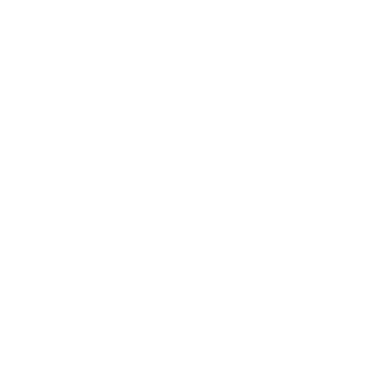

In [7]:

import snntorch.spikeplot as splt
import matplotlib.pyplot as plt
import torch

spike_data = torch.Tensor(100, 128, 1, 28, 28).uniform_() > 0.9
print(spike_data.size())
print(spike_data.dtype)
#  Index into a single sample from a minibatch
spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())
print(spike_data_sample)
#  Plot
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
#  Save as a gif60
anim.save("spike_img.gif")

[ 4105 71391 19263  2746 59063]
(5, 40, 12) (5,)
(40, 1, 12) 17
int64
bool
(40, 1, 12) 3
int64
bool
(40, 1, 12) 13
int64
bool
(40, 1, 12) 7
int64
bool
(40, 1, 12) 14
int64
bool


,,,,


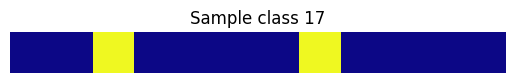

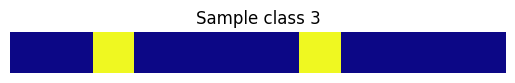

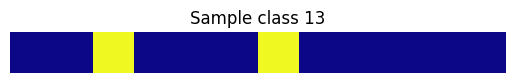

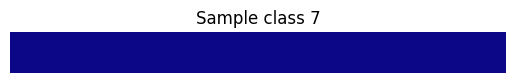

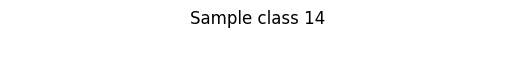

In [8]:
import numpy as np
import IPython.display as display
size =5
index = np.random.randint(0, x_train.shape[0],size=size)
print(index)
x_train_samples = x_train[index]
y_train_sample = y_train[index]
print(x_train_samples.shape, y_train_sample.shape)
for i in range(size):
    print(np.expand_dims(x_train_samples[i], axis=1).shape, y_train_sample[i])
    print(x_train_samples[i].dtype)
    x_train_sample = x_train_samples[i].astype(bool)
    print(x_train_sample[i].dtype)
    x_train_sample = torch.Tensor(np.expand_dims(x_train_sample, axis=1))

    fig, ax = plt.subplots()
    ax.set_title(f"Sample class {y_train_sample[i]}")
    anim = splt.animator(x_train_sample, fig, ax)
    anim.save(f"spike_img{i}.gif")

    # Assuming the generated GIF file is named "animation.gif"
gif_td = lambda gif: f'<td> <img src="{gif}" alt="Drawing" style="height: 250px;"/> </td>'
header = '<table><tr>'
images = ' '.join([gif_td(f'spike_img{i}.gif') for i in range(size)])
footer = '</tr></table>'
display.HTML(header + images + footer)


In [9]:
# Create a 1D array
arr = np.array([1, 2, 3, 4, 5])

# Unsqueeze the array to make it a 2D array
unsqueezed_arr = np.expand_dims(arr, axis=0)

print(unsqueezed_arr.shape)
print(unsqueezed_arr)

(1, 5)
[[1 2 3 4 5]]
